In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:


df = pd.read_excel("ny_citibikes_raw.xlsx")
pd.concat([df.head(3), df.tail(3)])

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
20397,2017-03-31 21:13:00,2017-03-31 21:18:00,3195,Sip Ave,3194,McGinley Square,29219,Subscriber,1956,65,65-74,264,4,3,Spring,18,Friday
20398,2017-03-31 21:26:00,2017-03-31 21:30:00,3195,Sip Ave,3201,Dey St,29276,Subscriber,1970,51,45-54,239,4,3,Spring,18,Friday
20399,2017-03-31 23:20:00,2017-03-31 23:30:00,3272,Jersey & 3rd,3268,Lafayette Park,24398,Subscriber,1984,37,35-44,618,10,3,Spring,18,Friday


## 1. Dataset Exploration
#### 1.1 What information does each column contain?


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  int64         
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  int64         
 7   User Type             20400 non-null  object        
 8   Birth Year            20400 non-null  int64         
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  object        
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

#### 1.2 Are there missing or duplicated values?
  

1. Check nulls

In [7]:
missing = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing)

total_missing = df.isnull().sum().sum()
print(f"\nTotal de valores faltantes en todo el DataFrame: {total_missing}")


Valores faltantes por columna:
Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

Total de valores faltantes en todo el DataFrame: 1


In [8]:
#En pandas cuando pones un Series booleando dentro de un df[], te devuelve las filas donde el Series es True
nulo = df[df["End Station Name"].isnull()]
nulo

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
9858,2017-02-25 12:36:00,2017-02-25 12:44:00,3220,5 Corners Library,3211,NaN,24522,Subscriber,1963,58,55-64,532,9,2,Winter,11,Saturday


In [9]:
df.dropna(inplace=True)

2. Check duplicated

In [10]:
duplicated = df.duplicated()
count_duplicated = duplicated[duplicated == True].count()
print("Total de valores duplicados:",count_duplicated)

Total de valores duplicados: 3555


In [11]:
df.drop_duplicates(inplace=True)

#### 1.3 What is the overall time span of the trips?

In [12]:
start = df["Start Time"].min()
end = df["Stop Time"].max()
total_duration = end - start
dias = total_duration.days
horas = total_duration.seconds // 3600
minutos = (total_duration.seconds % 3600) // 60
segundos = total_duration.seconds % 60
total_duration = f"{dias} días, {horas} horas, {minutos} minutos, {segundos} segundos"
print(f"Duración total del conjunto de datos: {total_duration}")
print(f"Se han recogido datos desde {start} hasta {end}")

Duración total del conjunto de datos: 89 días, 22 horas, 52 minutos, 0 segundos
Se han recogido datos desde 2017-01-01 00:38:00 hasta 2017-03-31 23:30:00


# 2. Basic Statistics
#### 2.1 What is the average trip duration (in minutes)?

In [13]:
trip_min_mean = df["Trip_Duration_in_min"].mean().round(2)
print(f"La duración media de los viajes en el primer trimestre de 2017 ha sido de: {trip_min_mean} minutos")

La duración media de los viajes en el primer trimestre de 2017 ha sido de: 9.58 minutos


#### 2.2 What is the minimum and maximum duration?

In [14]:
viaje_mas_corto = df["Trip Duration"].min()
print(f"El viaje más corto tuvo una duración de {viaje_mas_corto} segundos")
viaje_mas_largo = df["Trip_Duration_in_min"].max()
print(f"El viaje más largo tuvo una duración de {viaje_mas_largo} minutos")




El viaje más corto tuvo una duración de 61 segundos
El viaje más largo tuvo una duración de 6515 minutos


#### 2.3 What are the most common start and end stations?


In [15]:
estacion_inicio_mas_utilizada = df["Start Station Name"].mode()[0]
print(f"La estación de inicio más utilizada es: {estacion_inicio_mas_utilizada}")
estacion_fin_mas_utilizada = df["End Station Name"].mode()[0]
print(f"La estación de fin más utilizada es: {estacion_fin_mas_utilizada}")

print("\n- Top 5 estaciones de inicio:")
print(df['Start Station Name'].value_counts().head(5))
print("\n- Top 5 estaciones de fin:")
print(df['End Station Name'].value_counts().head(5))


La estación de inicio más utilizada es: Grove St PATH
La estación de fin más utilizada es: Grove St PATH

- Top 5 estaciones de inicio:
Start Station Name
Grove St PATH     2115
Exchange Place    1225
Sip Ave           1084
Hamilton Park     1069
Morris Canal       710
Name: count, dtype: int64

- Top 5 estaciones de fin:
End Station Name
Grove St PATH     2743
Exchange Place    1254
Sip Ave            955
Hamilton Park      949
Newport PATH       683
Name: count, dtype: int64


# 3. Users and Demographics
#### 3.1 How many unique bikes were used?
  

In [16]:
bicis_unicas = df["Bike ID"].nunique()
print(f"Número de bicicletas únicas utilizadas: {bicis_unicas}")

Número de bicicletas únicas utilizadas: 500


#### 3.2 What are the proportions of user types (Subscriber vs Customer)?


In [ ]:
tipos_usuarios = df["User Type"].value_counts(normalize=True) * 100
tipos_usuarios_total = df["User Type"].value_counts()
print("Cantidad de usuarios por tipo:")
print(tipos_usuarios_total)
print("\nProporción de tipos de usuarios:")
print(tipos_usuarios.round(2))

Cantidad de usuarios por tipo:
User Type
Subscriber       16526
One-time user      318
Name: count, dtype: int64

Proporciones de tipos de usuarios:
User Type
Subscriber       98.11
One-time user     1.89
Name: proportion, dtype: float64


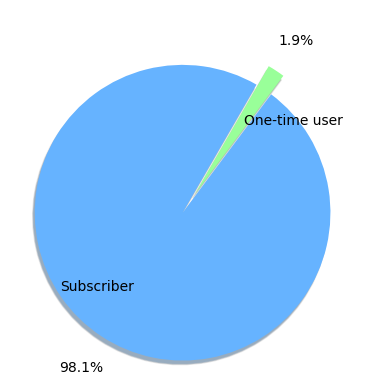

In [ ]:
labels = tipos_usuarios.index
sizes = tipos_usuarios.values

fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=labels, 
       autopct='%1.1f%%', 
       startangle=60, 
       colors=['#66b3ff','#99ff99'], 
       explode=(0.15, 0), 
       shadow={'ox': -0.01, 'edgecolor': '0.8', 'shade': 0.5},  
       pctdistance=1.25, 
       labeldistance=.6)

plt.show()

Prácticamente la totalidad de los usuarios del servicio son suscriptores, no llegando ni al 2% los usuarios que han ido por libre.

#### 3.3 What is the age distribution of the users? Which age group uses the service the most?

In [18]:
distribucion_edad = df['Age Groups'].value_counts().sort_index()
grupo_mas_frecuente = distribucion_edad.idxmax()
print("\nDistribución de edades de los usuarios:")
print(distribucion_edad)
print(f"\nEl grupo de edad que más utiliza el servicio es: {grupo_mas_frecuente} con {distribucion_edad.max()} usuarios.")


Distribución de edades de los usuarios:
Age Groups
18-24      54
25-34    4002
35-44    7698
45-54    2973
55-64    1447
65-74     615
75+        55
Name: count, dtype: int64

El grupo de edad que más utiliza el servicio es: 35-44 con 7698 usuarios.


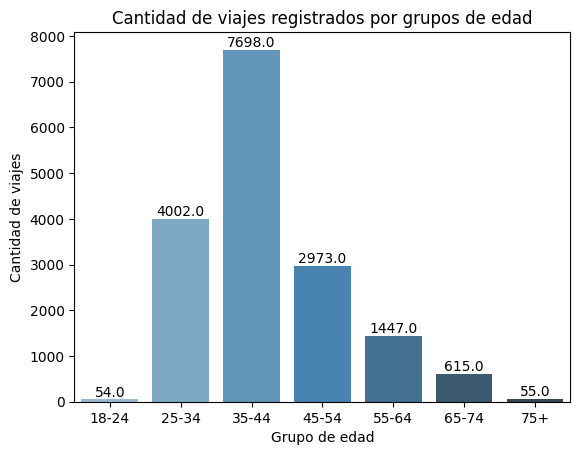

In [ ]:
ax = sns.barplot(x=distribucion_edad.index, y=distribucion_edad.values, hue=distribucion_edad.index, palette="Blues_d")
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
         ha='center', 
         va='center',      
         color='black', 
         xytext=(0, 5), 
         textcoords='offset points')
plt.title("Cantidad de viajes registrados por grupos de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de viajes")
plt.show()

El gráfico muestra la cantidad de viajes registrados por cada grupo de edad.  

Como no contamos con identificadores de usuario, este gráfico refleja la actividad total de viajes por grupo de edad, no el número real de usuarios.  

Según los datos, el grupo de edad 35-44 realiza la mayor cantidad de viajes, por lo que es el grupo más activo en el uso del servicio

# 4. Temporal Analysis
#### 4.1 How does the number of trips vary by weekday?

In [51]:
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
viajes_por_dia = df["Weekday"].value_counts().reindex(orden_dias)
viajes_por_dia

Weekday
Monday       2526
Tuesday      2460
Wednesday    3301
Thursday     2953
Friday       2449
Saturday     1590
Sunday       1565
Name: count, dtype: int64

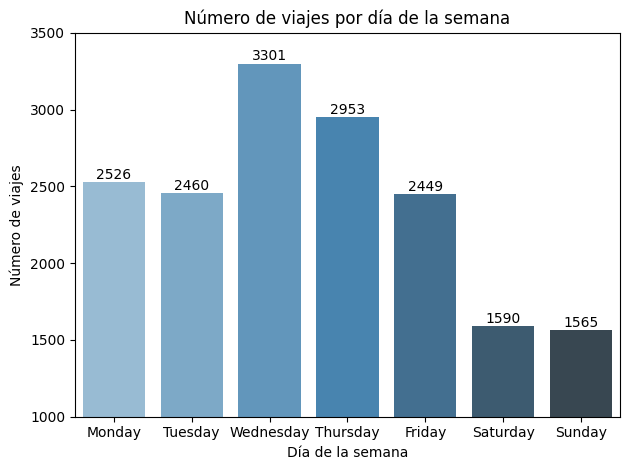

In [59]:
sns.barplot(x=viajes_por_dia.index, y=viajes_por_dia.values, hue=viajes_por_dia.index, palette="Blues_d")

plt.title("Número de viajes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de viajes")
plt.ylim(1000, viajes_por_dia.values.max() + 200)
for i, v in enumerate(viajes_por_dia.values):
    plt.text(i, v + 20, str(v), ha='center')

plt.tight_layout()
plt.show()

Observaciones:  
- La mayor parte de la actividad ocuerre los días laborables.  

- Los días más intensos son el miércoles y jueves, a mitad de semana.  

- Los lunes, martes y viernes tienen prácticamente la misma actividad.  

- Los fines de semana cae significativamente la actividad, sugiriendo que el servicio se utiliza mayormente para desplazarse los días de trabajo y no para ocio.

#### 4.2 Which month or season has the most rides?

In [101]:
total_meses = df['Month'].value_counts().sort_index()
total_estaciones = df['Season'].value_counts()
print("Número de viajes por mes:")
print(total_meses)
print("\nNúmero de viajes por estación:")
print(total_estaciones)

Número de viajes por mes:
Month
1    4619
2    5051
3    7174
Name: count, dtype: int64

Número de viajes por estación:
Season
Winter    9670
Spring    7174
Name: count, dtype: int64


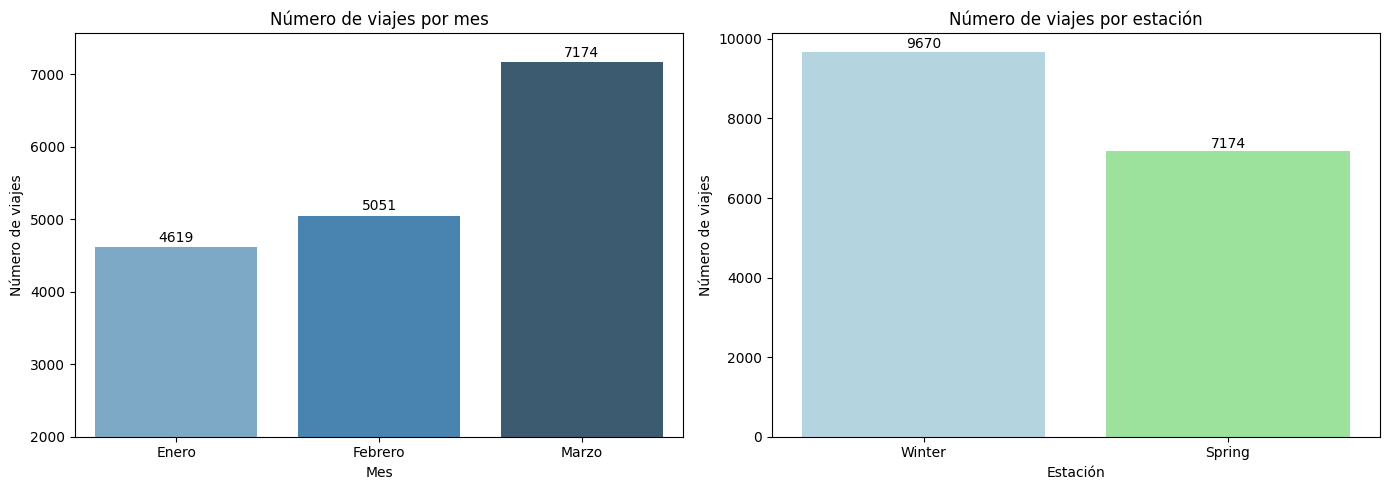

In [127]:
meses = {1: "Enero", 2: "Febrero", 3: "Marzo"}
meses_nombres = [meses[m] for m in total_meses.index]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

sns.barplot(x=meses_nombres, y=total_meses.values, hue=meses_nombres, ax=axs[0], palette="Blues_d")
axs[0].set_title("Número de viajes por mes")
axs[0].set_xlabel("Mes")
axs[0].set_ylabel("Número de viajes")
axs[0].set_ylim(2000, total_meses.values.max() + 400)

for i, v in enumerate(total_meses.values):
    axs[0].text(i, v + max(total_meses.values)*0.01, str(v), ha='center')


sns.barplot(x=total_estaciones.index, y=total_estaciones.values, ax=axs[1], hue=total_estaciones.index, palette=["lightblue", "lightgreen"])
axs[1].set_title("Número de viajes por estación")
axs[1].set_xlabel("Estación")
axs[1].set_ylabel("Número de viajes")

for i, v in enumerate(total_estaciones.values):
    axs[1].text(i, v + max(total_estaciones.values)*0.01, str(v), ha='center')

plt.tight_layout()
plt.show()


Observaciones:

- La cantidad de viajes aumenta progresivamente de enero a marzo.

- Marzo es el mes con mayor número de viajes (7174), casi un 55% más que enero.

- Esto podría reflejar un incremento estacional del uso del servicio, posiblemente debido a mejores condiciones climáticas o más actividad urbana hacia la primavera.

#### 4.3 What time of day do most trips start?

In [135]:
df['Start Hour'] = df['Start Time'].dt.hour
hora_salida = df['Start Hour'].value_counts().sort_index()
hora_salida_moda = hora_salida.idxmax()
print(f"La hora del día a la que comienzan la mayoría de los viajes es a las {hora_salida_moda} horas")

La hora del día a la que comienzan la mayoría de los viajes es a las 8 horas


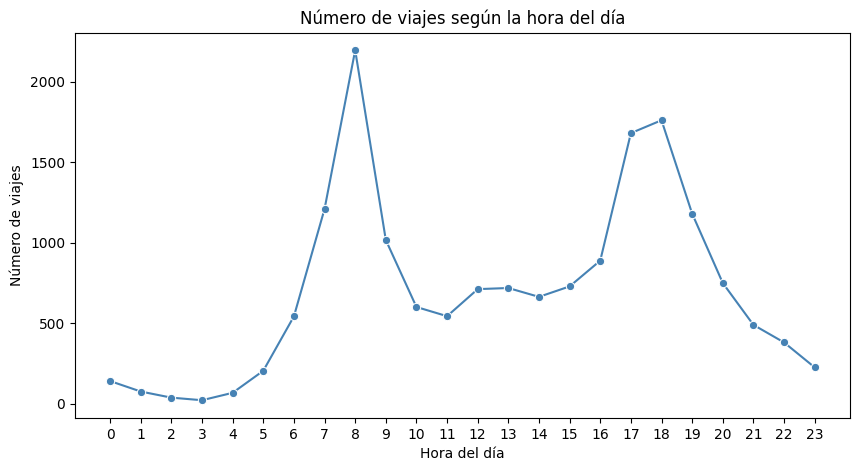

In [175]:
plt.figure(figsize=(10,5))

# Gráfico de línea
sns.lineplot(x=hora_salida.index, y=hora_salida.values, marker='o', color='steelblue')

plt.title("Número de viajes según la hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de viajes")


plt.xticks(hora_salida.index)  # asegurar que se muestren todas las horas
plt.show()

Observaciones:

- Apenas hay actividad en la madrugada, empezando el movimiento a las 5 de la mañana.

- La mayoría de los usuarios utiliza el servicio en horas punta, para la entrada y salida del trabajo.

- El resto de horas el uso del servicio se mantiene estable.


# 5. Geographic Analysis
#### 5.1 Which station pairs (start → end) appear most often?

In [148]:
pares_estaciones = df['Station Pair'] = df['Start Station Name'] + " → " + df['End Station Name']
pares_estaciones_mas_frecuentes = df['Station Pair'].value_counts()

print(pares_estaciones_mas_frecuentes)

Station Pair
Hamilton Park → Grove St PATH          401
Morris Canal → Exchange Place          366
Dixon Mills → Grove St PATH            293
Exchange Place → Morris Canal          290
Grove St PATH → Hamilton Park          273
                                      ... 
Garfield Ave Station → Bayside Park      1
Exchange Place → Indiana                 1
Astor Place → 5 Corners Library          1
Union St → Paulus Hook                   1
Paulus Hook → Leonard Gordon Park        1
Name: count, Length: 1154, dtype: int64


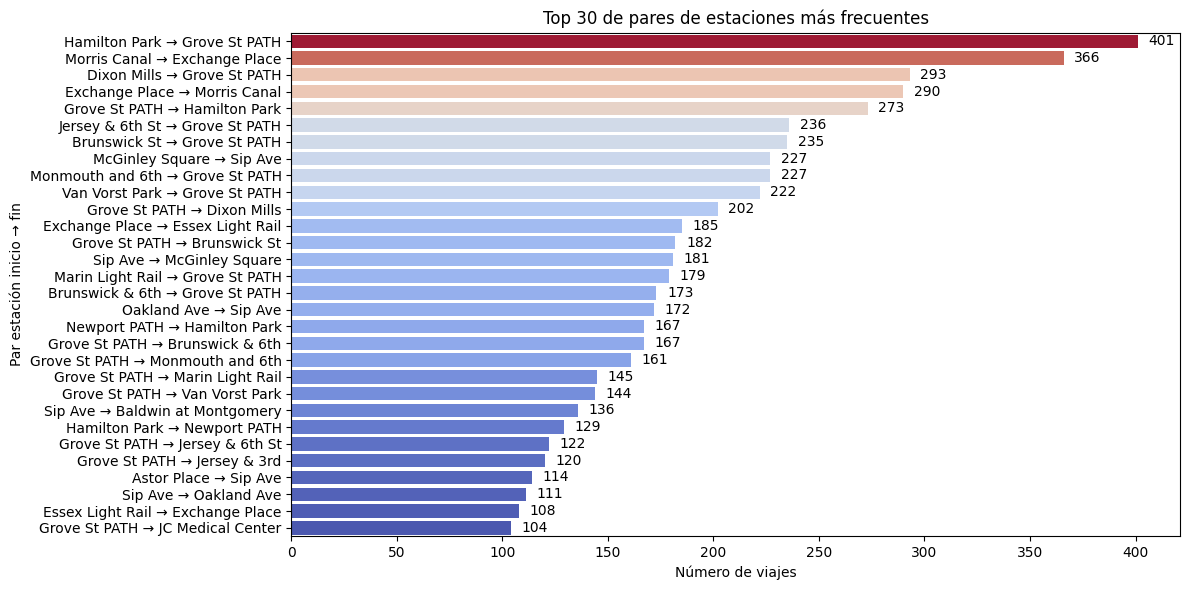

In [165]:
top_30_pares = pares_estaciones_mas_frecuentes.head(30)

plt.figure(figsize=(12,6))

ax = sns.barplot(x=top_30_pares.values, y=top_30_pares.index, hue=top_30_pares.values, legend=False, palette="coolwarm")

for i, v in enumerate(top_30_pares.values):
    ax.text(v + 5, i, str(v), va='center')

plt.xlabel("Número de viajes")
plt.ylabel("Par estación inicio → fin")
plt.title("Top 30 de pares de estaciones más frecuentes")
plt.tight_layout()
plt.show()


#### 5.2 Are there any stations that appear only as start or only as end stations?

In [177]:
estaciones_inicio = set(df['Start Station Name'].unique())
estaciones_fin = set(df['End Station Name'].unique())
solo_inicio = list(estaciones_inicio - estaciones_fin)
solo_fin = list(estaciones_fin - estaciones_inicio)
print("Estaciones que solo son de inicio:")
print(solo_inicio)
print("\nEstaciones que solo son de fin:")
print(solo_fin) 

Estaciones que solo son de inicio:
[]

Estaciones que solo son de fin:
['W 45 St & 8 Ave', 'JCBS Depot', 'Warren St & Church St', 'Broadway & W 36 St', 'Indiana', 'E 15 St & 3 Ave']


# 6. Temperature and Duration
#### 6.1 Is there any visible relationship between temperature and trip duration?

In [189]:
corr_temp_duracion = df['Temperature'].corr(df['Trip_Duration_in_min'])

print(f"Coeficiente de correlación de Pearson entre temperatura y duración del viaje: {corr_temp_duracion}")


Coeficiente de correlación de Pearson entre temperatura y duración del viaje: -0.0030341148711691916


Observaciones:  

- El coeficiente de correlación de Pearson entre la temperatura y la duración del viaje es prácticamente cero (-0.003). 

- La duración de los viajes no se ve afectada por la temperatura en este conjunto de datos.

- Posiblemente se deba a que la duración del viaje depende del propósito, como ir de casa al trabajo y viceversa.  

- La duración media de los viajes ya vimos que no era demasiado larga por lo que la temperatura no es un factor importante.

#### 6.2 How does average trip duration vary by season?

In [197]:
datos_duracion_temporada = df.groupby('Season')['Trip_Duration_in_min'].agg(['mean','median']).round(2)
datos_duracion_temporada

,mean,median
Season,,
Spring,9.72,5.0
Winter,9.47,5.0


Observaciones:

- Apenas se aprecia estacionalidad en la duración de los viajes.  

- Se refuerza que el motivo del uso es lo que determina la duración de este, el uso cotidiano.  

- Los usuarios no realizan viajes largos con este medio, al menos en los primeros meses del año.

# 7. Summary and Interpretation
#### 7.1 Write a short summary (5–10 lines) of your findings.

#### 7.2 Mention patterns, anomalies, or interesting trends you observed.